# Elastic Net

In [2]:
#Creating new dataframe
#Use 4 weeks of historic data alone to train model
import pandas as pd 
pd.set_option('display.float_format', '{:.6f}'.format)
df = pd.read_csv("datetime_data_frame.csv")
pd.set_option('display.float_format', '{:.6f}'.format)
columns = ['Unnamed: 0', 'a flu', 'baby flu', 'bad flu', 'chest infection symptoms', 'child flu', 'children flu', 'cold and flu symptoms', 'cold flu', 'cold or flu', 'cure flu', 'do i have flu', 'do i have the flu', 'dog flu', 'early flu symptoms', 'flu', 'flu advice', 'flu and cough', 'flu and pneumonia', 'flu and pregnancy', 'flu antibiotics', 'flu bug', 'flu complications', 'flu contagious', 'flu contagious period', 'flu duration', 'flu during pregnancy', 'flu epidemic', 'flu headache', 'flu how long', 'flu how long does it last', 'flu in adults', 'flu in babies', 'flu in children', 'flu in pregnancy', 'flu in toddlers', 'flu incubation', 'flu incubation period', 'flu infection', 'flu last', 'flu london', 'flu map', 'flu medicine', 'flu nhs', 'flu pain', 'flu pregnancy', 'flu prevention', 'flu recovery', 'flu recovery time', 'flu remedies', 'flu signs', 'flu sore throat', 'flu stomach', 'flu symptom', 'flu symptom checker', 'flu symptoms', 'flu symptoms in adults', 'flu symptoms in children', 'flu symptoms last', 'flu symptoms nhs', 'flu symptoms uk', 'flu symptons', 'flu symtoms', 'flu temperature', 'flu test', 'flu treatment', 'flu virus symptoms', 'flue', 'get rid of flu', 'google flu', 'got flu', 'h1n1 symptoms', 'have i got flu', 'how long can flu last', 'how long do flu symptoms last', 'how long does flu last', 'how long is flu contagious', 'how long is the flu contagious', 'how long to recover from flu', 'how to get over flu', 'how to get rid of flu', 'how to prevent flu', 'how to recover from flu', 'how to treat flu', 'i have flu', 'i have the flu', 'incubation period for flu', 'is flu contagious', 'latest flu', 'man flu', 'medication for flu', 'medicine for flu', 'mild flu', 'nhs direct flu', 'pneumonia symptoms in adults', 'recover from flu', 'severe flu', 'signs of flu', 'signs of the flu', 'stages of flu', 'stomach flu symptoms', 'swine flu symptoms', 'swine flu treatment', 'symptom of flu', 'symptoms of flu', 'symptoms of swine flu', 'symptoms of the flu', 'the flu symptoms', 'treat flu', 'treating flu', 'treatment for flu', 'viral flu', 'what are flu symptoms', 'what are the symptoms of flu', 'what are the symptoms of the flu', 'what is flu', 'what to take for flu', 'when is flu contagious', 'wine flu', 'bronchitis symptoms', 'cold and flu', 'influenza symptoms', 'bronchitis', 'chest infection', 'colds', 'colds and flu', 'cough medicine', 'cough remedy', 'difference between a cold and flu', 'having the flu', 'how long does the flu last', 'laryngitis', 'lemsip', 'lurgy', 'pleurisy', 'sinusitis', 'winter vomiting bug symptoms', 'antibiotics for flu', 'cough flu', 'difference between cold and flu', 'fever flu', 'flu aches', 'flu diarrhea', 'flu pregnant', 'flu remedy', 'flu tablets', 'how long does a flu last', 'how to cure flu', 'how to get rid of the flu', 'recovering from flu', 'recovery from flu', 'remedies for flu', 'symptoms of pneumonia in adults', 'symptoms of swine', 'tummy flu', 'best medicine for flu', 'cough after flu', 'flu going around', 'flu home remedies', 'food for flu', 'home remedies for flu', 'how to get over the flu', 'how to get rid of a flu', 'is the flu contagious', 'sinusitis symptoms', 'how long does the flu', 'gastric flu', 'sinuses', 'symptoms of bronchitis', 'flu coughing', 'current flu', 'current flu virus', 'flu strain', 'tonsilitis', 'bad cold', 'catarrh', 'chilblains', 'cough remedies', 'coughing blood', 'coughing up', 'coughing up blood', 'coughs', 'flu rash', 'get rid of a cough', 'get rid of cough', 'how to get rid of a cough', 'how to get rid of cough', 'nhs swine', 'night nurse', 'stop coughing', 'tamiflu', 'tamiflu dosage', 'tamiflu side effects', 'the death cure', 'what is tamiflu', 'what to eat when you have the flu']
df.drop(columns, axis=1, inplace =True)
df.insert(3, "Disease Rate -1", 0)
df.insert(3, "Disease Rate -2", 0)
df.insert(3, "Disease Rate -3", 0)
df.insert(3, "Disease Rate -4", 0)

start_row = 4
pd.set_option('display.float_format', '{:.6f}'.format)
for i in range(start_row, len(df)):
    df.loc[i, "Disease Rate -4"] = df.loc[i-4, "Disease Rate"]
    df.loc[i, "Disease Rate -3"] = df.loc[i-3, "Disease Rate"]
    df.loc[i, "Disease Rate -2"] = df.loc[i-2, "Disease Rate"]
    df.loc[i, "Disease Rate -1"] = df.loc[i-1, "Disease Rate"]

In [3]:
df

year week  year  week  Disease Rate -4  Disease Rate -3  \
0    2004-01-05  2004     1         0.000000         0.000000   
1    2004-01-12  2004     2         0.000000         0.000000   
2    2004-01-19  2004     3         0.000000         0.000000   
3    2004-01-26  2004     4         0.000000         0.000000   
4    2004-02-02  2004     5        18.716703        12.366981   
..          ...   ...   ...              ...              ...   
776  2018-11-26  2018    47         3.746275         5.263555   
777  2018-12-03  2018    48         5.263555         4.848258   
778  2018-12-10  2018    49         4.848258         6.586396   
779  2018-12-17  2018    50         6.586396         6.175297   
780  2018-12-24  2018    51         6.175297         7.382408   

     Disease Rate -2  Disease Rate -1  Disease Rate  
0           0.000000         0.000000     18.716703  
1           0.000000         0.000000     12.366981  
2           0.000000         0.000000      8.808089  
3           0.000000         0.000000      6.575904  
4           8.808089         6.575904      6.837619  
..               ...              ...           ...  
776         4.848258         6.586396      6.175297  
777         6.586396         6.175297      7.382408  
778         6.175297         7.382408      8.012008  
779         7.382408         8.012008     10.447732  
780         8.012008        10.447732      9.031604  

[781 rows x 8 columns]

In [25]:
#ElasticNet function
#train with data from the past five years
#test with current year
#hyperparameter done through grid search:  l1_ratio = 0.99 and alphas = [1] 
#Function does the following: 
    #fit and test model 
    #plot graphs
    #return mse

from numpy import mean, arange
from numpy import std 
from numpy import absolute 
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNetCV, ElasticNet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from sklearn.metrics import mean_squared_error

def elasticNet(df): 
    persistence_df= create_persistence(df, 1)
    #train on previous 5 year
    mses= []
    for year in range(2009, 2019): 
        train_data =  df.loc[(df["year"]>=year-5) & (df["year"]<=year-1)]
        test_data = df.loc[df["year"]==year]

        data = train_data.values
        if year == 2009: 
            X, y = data[4:, 3:-1],data[4:, -1]
        else: 
            X, y = data[:, 3: -1], data[:, -1]

        test_values = test_data.values
        test_X, test_y = test_values[:,3:-1], test_values[:,-1]
        p_y_df = persistence_df[persistence_df['year week'].isin(test_values[:,0])]

        cv = RepeatedKFold(n_splits = 10, n_repeats=3, random_state =1)

        model = ElasticNetCV(l1_ratio = 0.99, alphas = [1], cv=cv)

        # model = ElasticNet(alpha=1.0, l1_ratio = 0.5)
        # model.fit(X,y)
        results = model.fit(X,y)

        predicted = model.predict(test_X)
        # predicted = model.predict(test_X)

        
        mse = mean_squared_error(predicted,test_y)
        print("mse {}: {}".format(year, mse))
        mses.append(mse)
        
        fig, ax = plt.subplots(1, 1, figsize=(4, 4), constrained_layout=True)

        #plot
        ax.plot(test_values[:,0], predicted, label ="predicted") #test_values[:0] = year week 
        ax.plot(test_values[:,0],test_y, label="ground truth")
        ax.plot(p_y_df["year week"], p_y_df["Persistance"].values, label="Persistence")
        plt.legend()
        plt.title("Year: {}".format(year))
        # Major ticks every half year, minor ticks every month,
        # ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
        # ax.xaxis.set_minor_locator(mdates.MonthLocator())
        start, end = ax.get_xlim()
        ax.xaxis.set_ticks(arange(start, end, 8))
        ax.grid(True)
        ax.set_ylabel('Disease Rate')

        # different formats:
        ax.set_title(year, loc='left', y=0.85, x=0.02, fontsize='medium')


        # Text in the x axis will be displayed in 'YYYY-mm' format.
        # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%d'))
        # Rotates and right-aligns the x labels so they don't crowd each other.
        for label in ax.get_xticklabels(which='major'):
            label.set(rotation=30, horizontalalignment='right')
    return mses

In [5]:
#create persistence model. 
#taken from our group's github
def create_persistence(data, shift, persistance_col_name='Persistance'):
    """
    Parameters:
    data (DataFrame): original data
    shift (int): number of weeks to shift forward, must be greater than 0.
    
    Returns:
    DataFrame containing baseline prediction column with label 'Prediction Rate'
    """
    if shift <= 0:
        raise ValueError('shift must be greater than 0')
    data_baseline = data.copy()
    data_baseline[persistance_col_name] = data_baseline['Disease Rate'].shift(shift)
    data_baseline.drop(data_baseline.head(shift).index, inplace=True)  # drop first 'shift' num of rows
    return data_baseline

mse 2009: 323.39625501184975
mse 2010: 64.63374714348153
mse 2011: 20.011223021818758
mse 2012: 7.412975802737282
mse 2013: 5.4926061403928435
mse 2014: 6.917217294892129
mse 2015: 3.4574855996888854
mse 2016: 8.146549358256026
mse 2017: 11.076412173083801
mse 2018: 9.72845310734971


year  Historic Data Alone
0  2009           323.396255
1  2010            64.633747
2  2011            20.011223
3  2012             7.412976
4  2013             5.492606
5  2014             6.917217
6  2015             3.457486
7  2016             8.146549
8  2017            11.076412
9  2018             9.728453

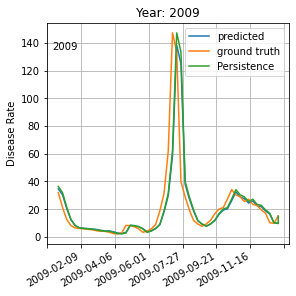

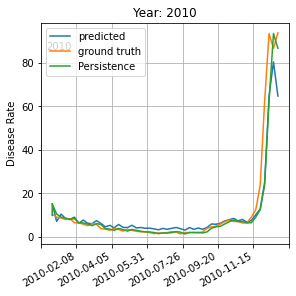

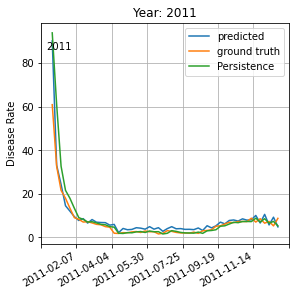

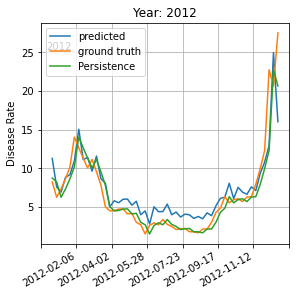

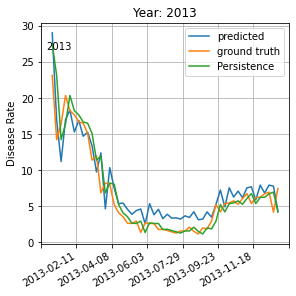

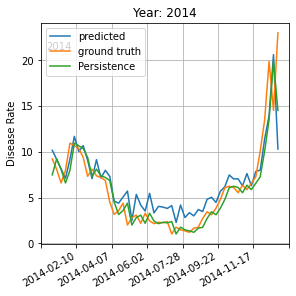

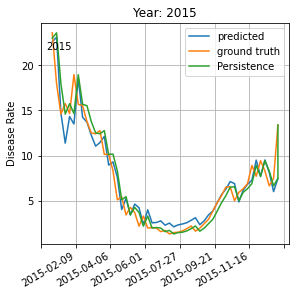

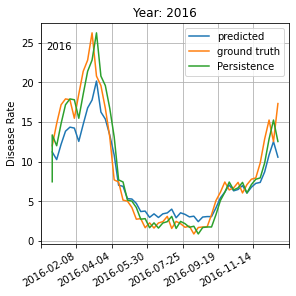

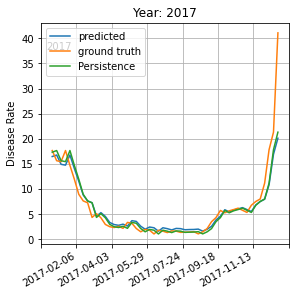

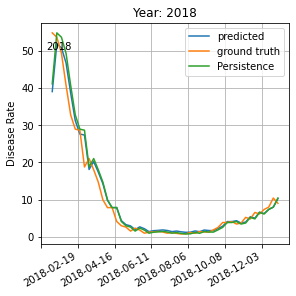

In [27]:
#create list of MSEs, generated from prediction from "historic data alone"
#this list will then grow to accomodate prediction made from "historic data + 'n-threshold' terms"

d = {'year':["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017","2018"]}
mse_df = pd.DataFrame(data=d)


mse_list = elasticNet(df)
mse_df["Historic Data Alone"]= mse_list
mse_df

50 threshold with previous 4-week data
mse 2009: 323.85025505883317
mse 2010: 95.73614953549841
mse 2011: 22.101139556261167
mse 2012: 7.06074712517551
mse 2013: 8.028719495331925
mse 2014: 16.894460575853437
mse 2015: 4.768725843698239
mse 2016: 10.023989031791167
mse 2017: 10.99884958336809
mse 2018: 12.270727145510877
100 threshold with previous 4-week data
mse 2009: 323.75099009164705
mse 2010: 126.80580891187437
mse 2011: 22.726434482687907
mse 2012: 7.45204789030949
mse 2013: 11.81403800116382
mse 2014: 16.877806575224238
mse 2015: 5.424672853840268
mse 2016: 9.338609031400928
mse 2017: 10.958963765564018
mse 2018: 11.890907106662846
150 threshold with previous 4-week data
mse 2009: 322.87709852153614


<ipython-input-25-5b833295473e>:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(4, 4), constrained_layout=True)


mse 2010: 178.17339039810798
mse 2011: 25.92999701184529
mse 2012: 7.647705166541526
mse 2013: 11.144753905330289
mse 2014: 17.587833598134992
mse 2015: 5.527702190525789
mse 2016: 9.750376945516786
mse 2017: 11.017405943023705
mse 2018: 11.933180462479209
200 threshold with previous 4-week data
mse 2009: 323.2688989474448
mse 2010: 308.3512571634628
mse 2011: 42.73065102328147
mse 2012: 8.706696037280986
mse 2013: 11.716421667178974
mse 2014: 17.84601192931003
mse 2015: 5.846636302694957
mse 2016: 10.179031857701677
mse 2017: 11.08309661819695
mse 2018: 11.811232725145535
250 threshold with previous 4-week data
mse 2009: 324.78085503791345
mse 2010: 592.2761582540703
mse 2011: 43.69827675032664


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.386031761217964, tolerance: 7.310557877120609
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.64588019207531, tolerance: 4.860599842359852
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.63338457637292, tolerance: 7.653677664047177
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/skl

mse 2012: 13.39139577622576
mse 2013: 12.9733216056423


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.236819365136398, tolerance: 6.839403681469735
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.461299637820048, tolerance: 7.503619854279425
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.799561717785764, tolerance: 7.477516143012309
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/

mse 2014: 18.325045942276844
mse 2015: 6.469207283600032
mse 2016: 10.488801767143261
mse 2017: 11.126081044319083
mse 2018: 11.735882539407553
300 threshold with previous 4-week data
mse 2009: 325.1885934181642
mse 2010: 803.4610135741228
mse 2011: 63.12423152119239


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213.21427941714046, tolerance: 6.560996019864442
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1096.5522607713788, tolerance: 5.3655119276178596
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549.2049474741907, tolerance: 5.957177996140628
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/

/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3810.2065829755056, tolerance: 7.453259825320454
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1712.588891168566, tolerance: 7.065041501989308
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4753.772816993258, tolerance: 7.451730309833965
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sk

mse 2012: 28.75717371191004


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5180.494885266857, tolerance: 7.336687628064205
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5156.0417384962475, tolerance: 7.667453777195704
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5256.122337432394, tolerance: 7.001790920311207
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sk

mse 2013: 13.300402714486712


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2235.260490648334, tolerance: 5.605208181606187
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5403.011676667449, tolerance: 7.525467114150944
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2692.65535426284, tolerance: 5.898194711283455
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5624.182918216491, tolerance: 7.651234033161738
  model = cd_fast.enet_coordinate_descent(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 895.5308208490246, tolerance: 2.590247842625001
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1602.3359047210338, tolerance: 3.3383345308250103
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklear

mse 2014: 26.295691262171907


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 972.7198974064523, tolerance: 3.3663809660897592
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.67442130170002, tolerance: 1.97284460196697
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1583.8883978299664, tolerance: 3.329587900120275
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/s

mse 2015: 5.614166021351837
mse 2016: 9.262153866470634
mse 2017: 11.049575340703175
mse 2018: 11.932129005563636
350 threshold with previous 4-week data
mse 2009: 323.9015472401913
mse 2010: 259.75528765592884


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 665.8919166860096, tolerance: 6.119598504966492
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1574.9204428227044, tolerance: 6.560996019864442
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239.67017913330983, tolerance: 5.3655119276178596
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/

/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2029.028015676954, tolerance: 7.613571537776418
  model = cd_fast.enet_coordinate_descent(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5653.170589322573, tolerance: 7.453259825320454
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5189.465151625827, tolerance: 7.065041501989308
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/

mse 2011: 74.91972304787825


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5252.166823827739, tolerance: 7.093253764497687
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5598.789701410764, tolerance: 7.45698651474792
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5732.740348085034, tolerance: 7.125137014234492
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/skle

mse 2012: 26.15086223703808


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4591.512254608098, tolerance: 7.699460890688969
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1754.7199679660953, tolerance: 4.860599842359852
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2384.723518630779, tolerance: 5.825283408209593
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sk

mse 2013: 15.860822036103526


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2494.9904996725063, tolerance: 5.605208181606187
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4695.466373931974, tolerance: 7.525467114150944
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3106.884687511754, tolerance: 5.898194711283455
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sk

/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3866.6723543048424, tolerance: 6.878652314793534
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2156.5002236259725, tolerance: 3.8582028538850053
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4469.768563363843, tolerance: 7.651234033161738
  model = cd_fast.enet_coordinate_descent(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklea

mse 2014: 25.61236528512243


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1144.2906187037186, tolerance: 3.28385676673438
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1448.3389053001983, tolerance: 2.597474711510871
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 786.7358108522151, tolerance: 3.009998182859246
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sk

mse 2015: 5.786893809675214
mse 2016: 9.313329218222362
mse 2017: 10.965607119133562
mse 2018: 12.219948557810335
400 threshold with previous 4-week data
mse 2009: 319.34034518377496
mse 2010: 494.0968142786314


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 551.569849708555, tolerance: 6.119598504966492
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3105.6397148157757, tolerance: 6.560996019864442
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123.97460505012623, tolerance: 5.3655119276178596
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/s

mse 2011: 78.23586313347221


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4050.0991590191366, tolerance: 7.518422451682005
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6104.53298445409, tolerance: 7.691272587050675
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5359.869389977137, tolerance: 7.720772611136932
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/skl

mse 2012: 103.01157184596097


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5645.419841169113, tolerance: 7.336687628064205
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5984.77450986104, tolerance: 7.667453777195704
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5940.244466362744, tolerance: 7.001790920311207
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/skle

mse 2013: 21.30254139710726


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5025.368544783526, tolerance: 7.223865762065424
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2883.0332965337307, tolerance: 6.839403681469735
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1854.210058662246, tolerance: 7.473912606638397
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sk

mse 2014: 32.91377450103508


/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 826.9836131821668, tolerance: 3.009998182859246
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 820.3274672428203, tolerance: 3.021014143060919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 981.97482473673, tolerance: 3.283772256490089
  model = cd_fast.enet_coordinate_descent_gram(
/Users/james/opt/anaconda3/lib/python3.8/site-packages/sklea

mse 2015: 6.680769758216114
mse 2016: 9.308639922555724
mse 2017: 10.978933999981656
mse 2018: 12.194695210940852


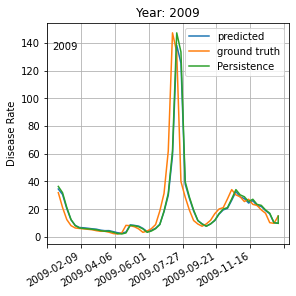

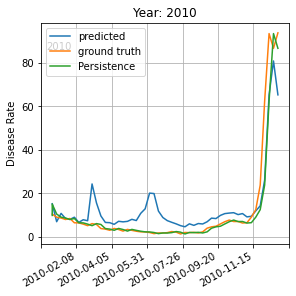

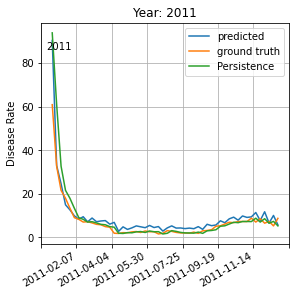

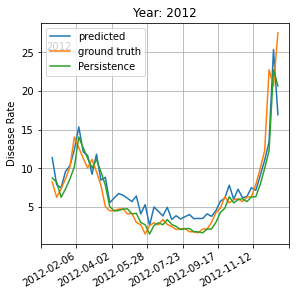

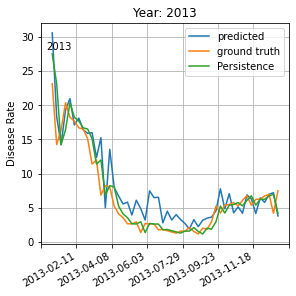

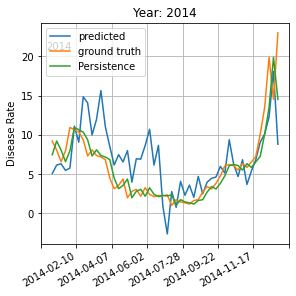

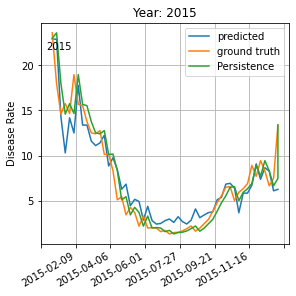

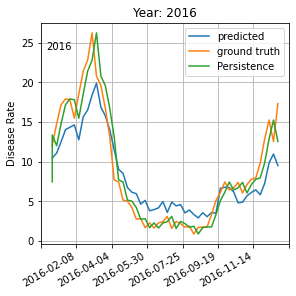

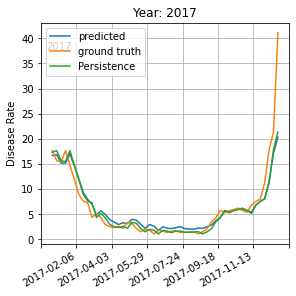

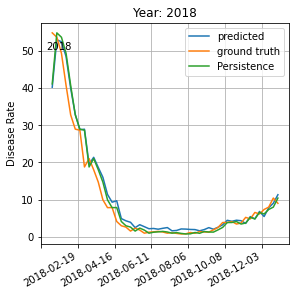

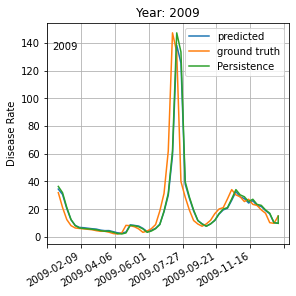

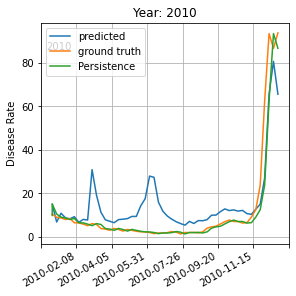

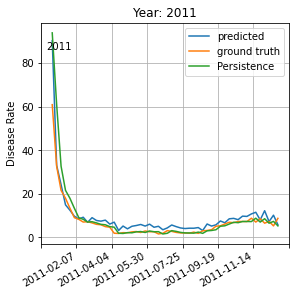

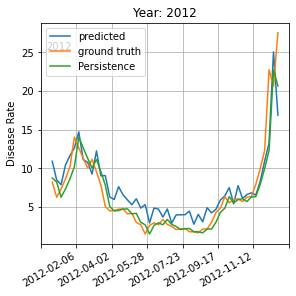

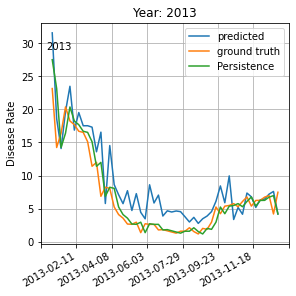

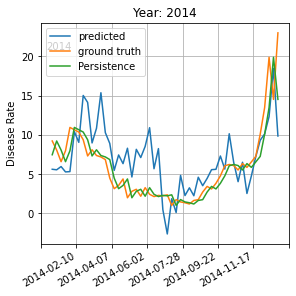

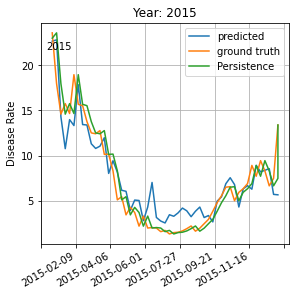

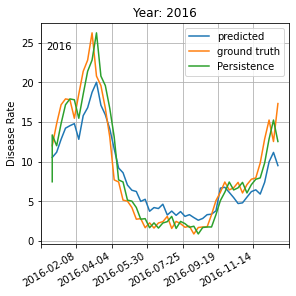

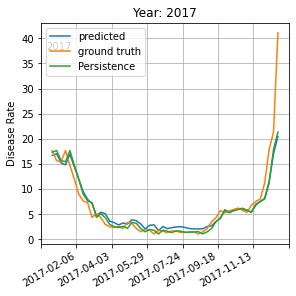

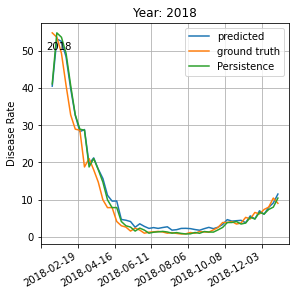

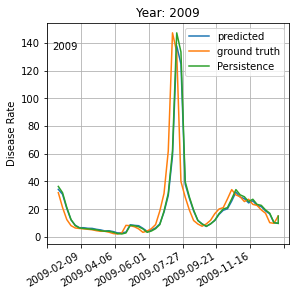

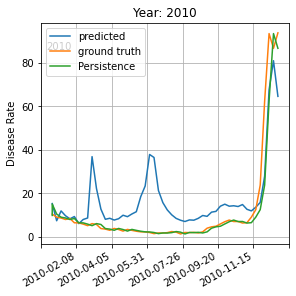

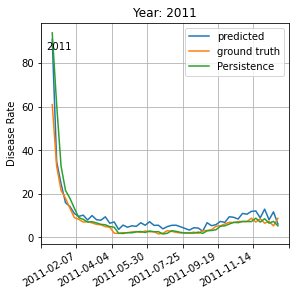

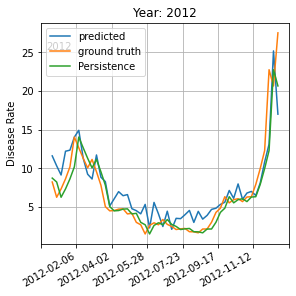

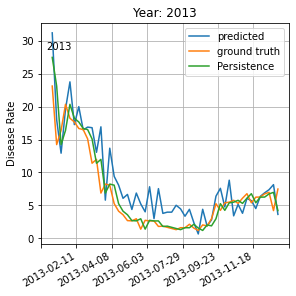

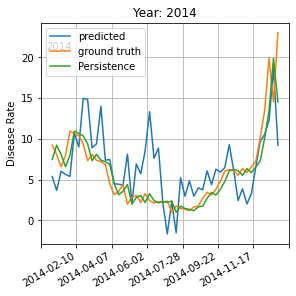

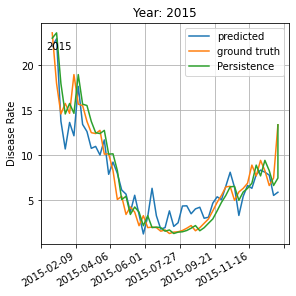

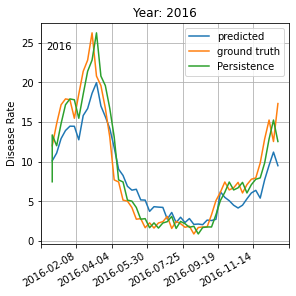

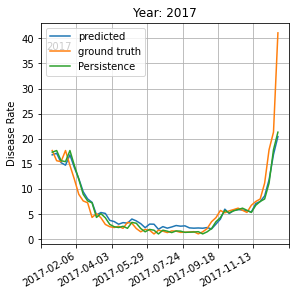

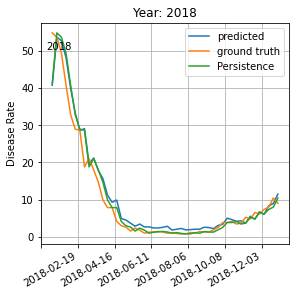

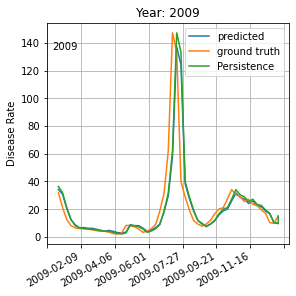

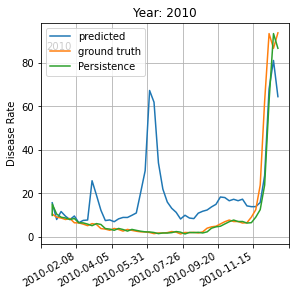

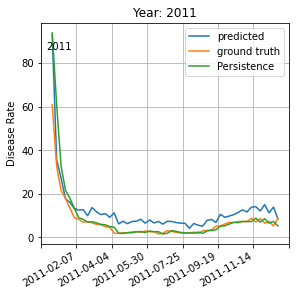

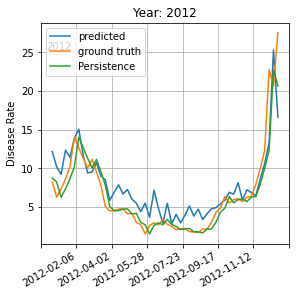

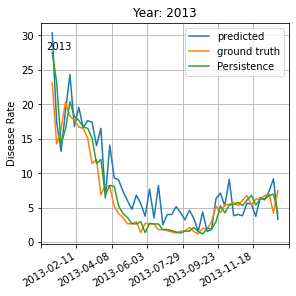

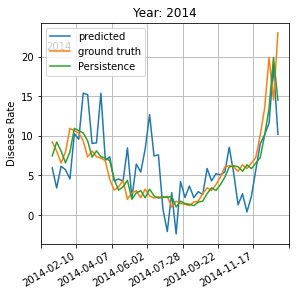

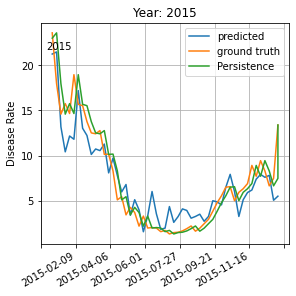

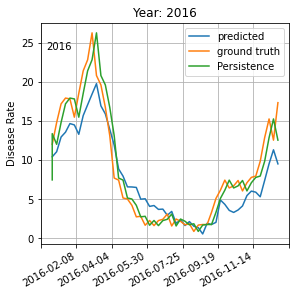

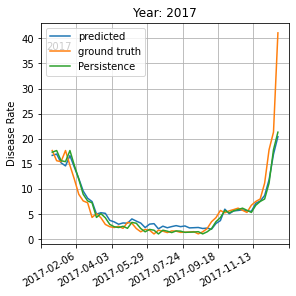

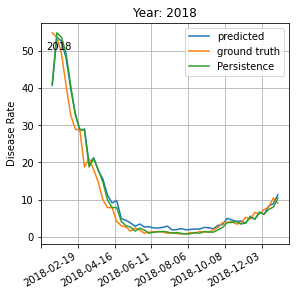

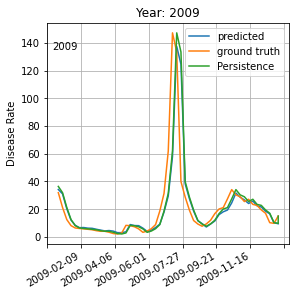

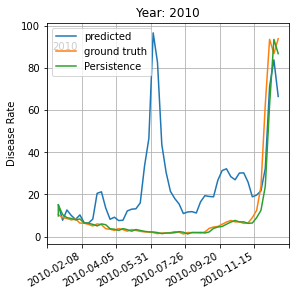

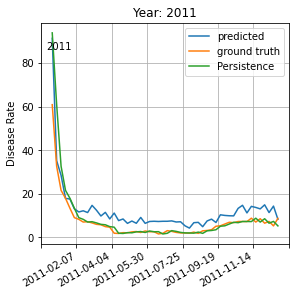

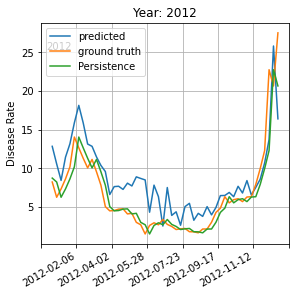

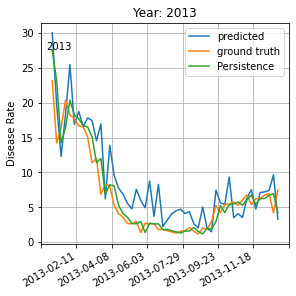

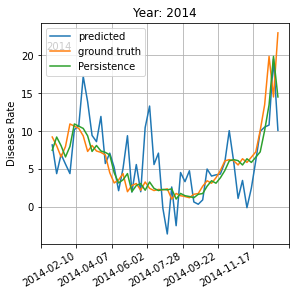

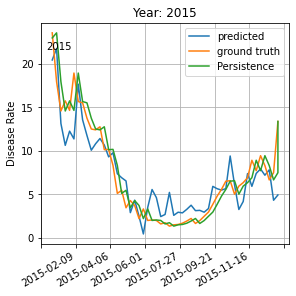

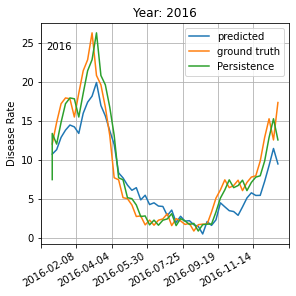

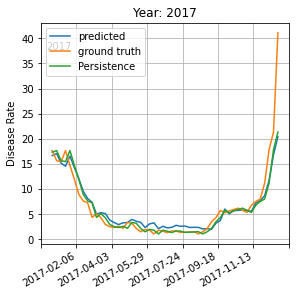

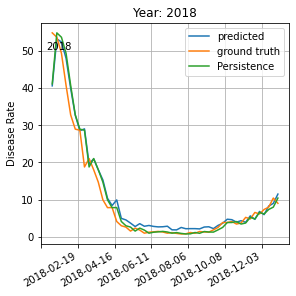

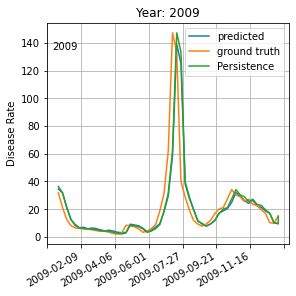

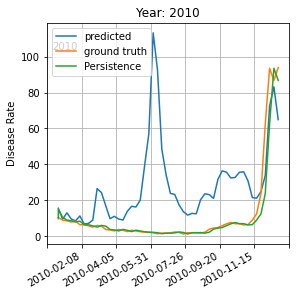

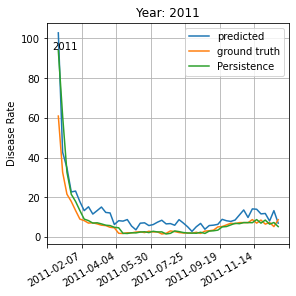

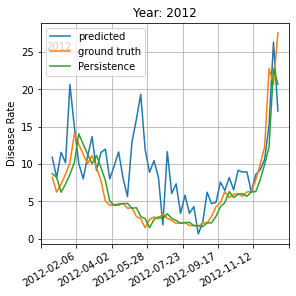

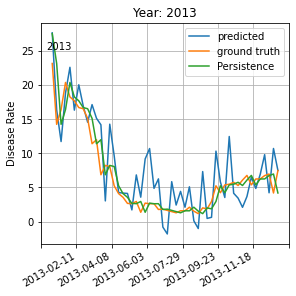

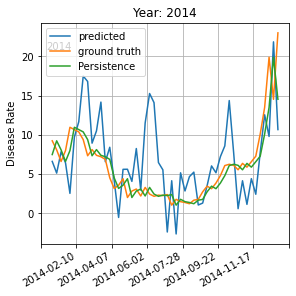

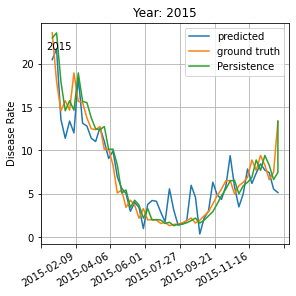

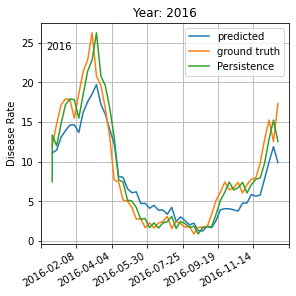

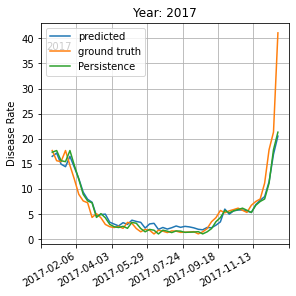

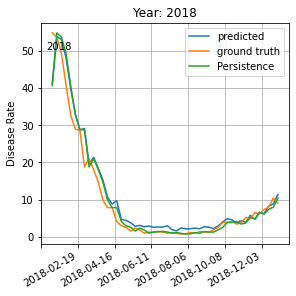

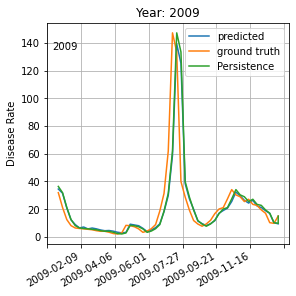

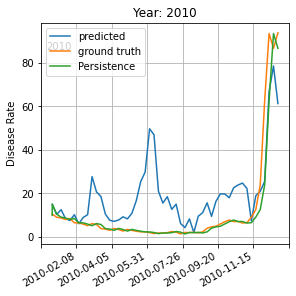

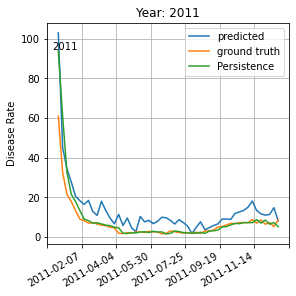

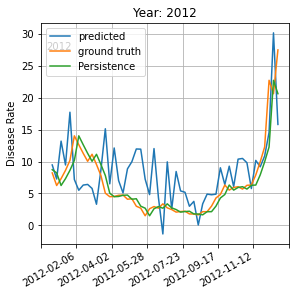

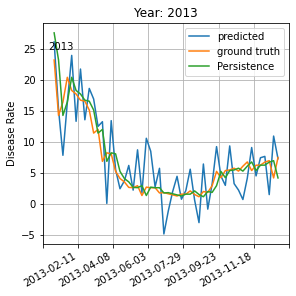

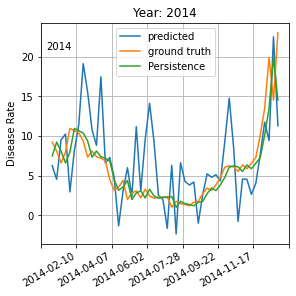

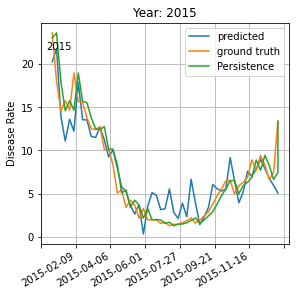

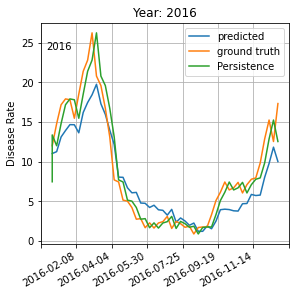

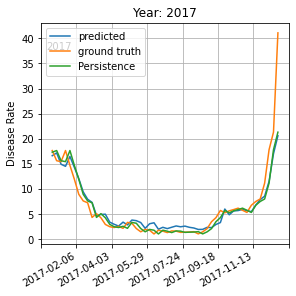

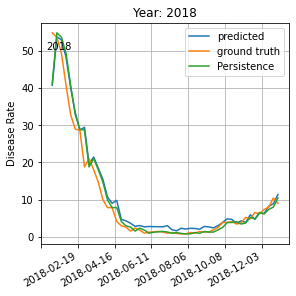

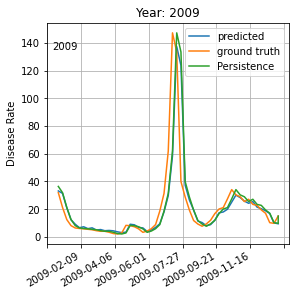

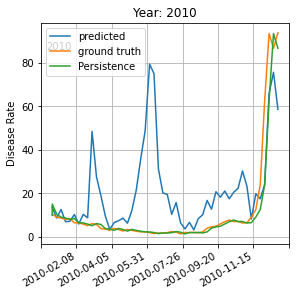

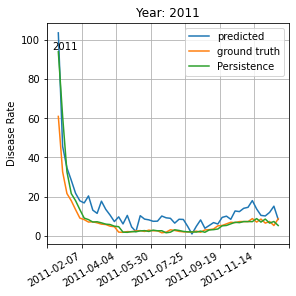

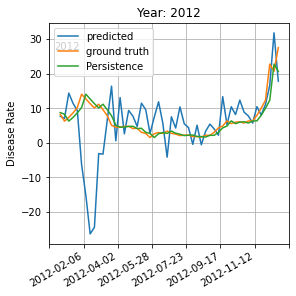

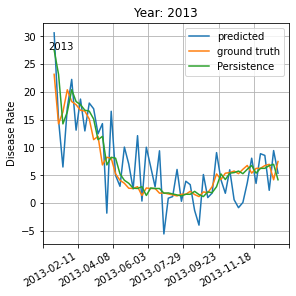

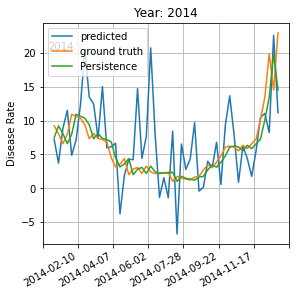

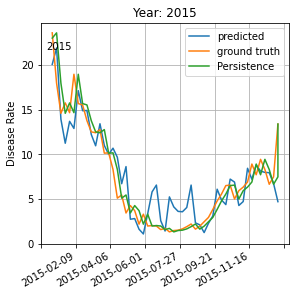

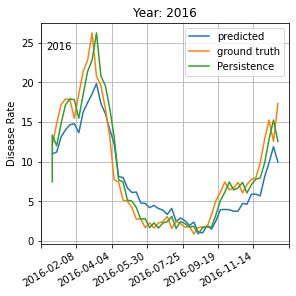

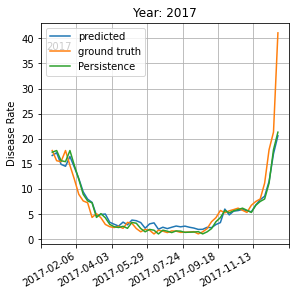

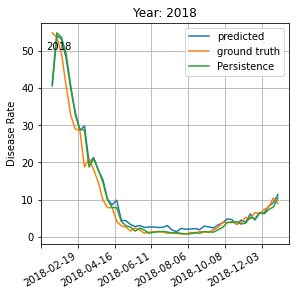

In [26]:
#

for i in range(50, 450, 50): 
    t_df = pd.read_csv("date_time_threshold_data_frames/{}_zero_terms.csv".format(i))
    d_n_t_df = pd.merge(df, t_df, on=["year week","year","week", "Disease Rate"])
    col = d_n_t_df.pop("Disease Rate")
    d_n_t_df.insert(d_n_t_df.shape[1], col.name, col)
    print("{} threshold with previous 4-week data".format(i))
    mse_list = elasticNet(d_n_t_df)
    mse_df["historic data + {} threshold".format(i)] = mse_list

In [13]:
#take into account MSEs from persistence model
persistence_df= create_persistence(df, 1)
mses = []
for i in range(2009,2019):
    data = persistence_df.loc[persistence_df["year"]==i]
    mse = mean_squared_error(data["Persistance"], data["Disease Rate"])
    mses.append(mse)
mse_df["Persistence mse"] = mses

In [14]:
#MSEs for ElasticNet
mse_df

year  Historic Data Alone  historic data + 50 threshold  \
0  2009           323.396255                    323.850255   
1  2010            64.633747                     95.736150   
2  2011            20.011223                     22.101140   
3  2012             7.412976                      7.060747   
4  2013             5.492606                      8.028719   
5  2014             6.917217                     16.894461   
6  2015             3.457486                      4.768726   
7  2016             8.146549                     10.023989   
8  2017            11.076412                     10.998850   
9  2018             9.728453                     12.270727   

   historic data + 100 threshold  historic data + 150 threshold  \
0                     323.750990                     322.877099   
1                     126.805809                     178.173390   
2                      22.726434                      25.929997   
3                       7.452048                       7.647705   
4                      11.814038                      11.144754   
5                      16.877807                      17.587834   
6                       5.424673                       5.527702   
7                       9.338609                       9.750377   
8                      10.958964                      11.017406   
9                      11.890907                      11.933180   

   historic data + 200 threshold  historic data + 250 threshold  \
0                     323.268899                     324.780855   
1                     308.351257                     592.276158   
2                      42.730651                      43.698277   
3                       8.706696                      13.391396   
4                      11.716422                      12.973322   
5                      17.846012                      18.325046   
6                       5.846636                       6.469207   
7                      10.179032                      10.488802   
8                      11.083097                      11.126081   
9                      11.811233                      11.735883   

   historic data + 300 threshold  historic data + 350 threshold  \
0                     325.188593                     323.901547   
1                     803.461014                     259.755288   
2                      63.124232                      74.919723   
3                      28.757174                      26.150862   
4                      13.300403                      15.860822   
5                      26.295691                      25.612365   
6                       5.614166                       5.786894   
7                       9.262154                       9.313329   
8                      11.049575                      10.965607   
9                      11.932129                      12.219949   

   historic data + 400 threshold  Persistence mse  
0                     319.340345       343.348303  
1                     494.096814        52.846662  
2                      78.235863        40.638749  
3                     103.011572         4.428477  
4                      21.302541         4.190132  
5                      32.913775         4.080403  
6                       6.680770         3.164744  
7                       9.308640         4.084953  
8                      10.978934         9.977886  
9                      12.194695        10.918060

# Ridge Regression

In [23]:
#list of alphas (hyperparam) given, model will selet the best hyperparam for each year. 
#training was done with 10-fold cross validation 
#Function does the following: 
    #fit and test model 
    #plot graphs
    #return mse

from sklearn.linear_model import RidgeCV

def Ridge(df): 
    persistence_df= create_persistence(df, 1)
    #train on previous 5 year
    mses= []
    for year in range(2009, 2019): 
        train_data =  df.loc[(df["year"]>=year-5) & (df["year"]<=year-1)]
        test_data = df.loc[df["year"]==year]

        data = train_data.values
        if year == 2009: 
            X, y = data[4:, 3:-1],data[4:, -1]
        else: 
            X, y = data[:, 3: -1], data[:, -1]

        test_values = test_data.values
        test_X, test_y = test_values[:,3:-1], test_values[:,-1]
        p_y_df = persistence_df[persistence_df['year week'].isin(test_values[:,0])]

        cv = RepeatedKFold(n_splits = 10, n_repeats=3, random_state =1)
        grid = dict()
        grid["alpha"] = [250,500,1000,1500] #0
        
        model = RidgeCV(alphas = grid["alpha"], cv=cv)

        # model = ElasticNet(alpha=1.0, l1_ratio = 0.5)
        # model.fit(X,y)
        results = model.fit(X,y)

        predicted = model.predict(test_X)
        # predicted = model.predict(test_X)

        from sklearn.metrics import mean_squared_error
        mse = mean_squared_error(predicted,test_y)
        print("mse {}: {}".format(year, mse))
        mses.append(mse)


        fig, ax = plt.subplots(1, 1, figsize=(4, 4), constrained_layout=True)

        #plot
        ax.plot(test_values[:,0], predicted, label ="predicted") #test_values[:0] = year week 
        ax.plot(test_values[:,0],test_y, label="ground truth")
        ax.plot(p_y_df["year week"], p_y_df["Persistance"].values, label="Persistence")
        plt.legend()
        plt.title("Year: {}".format(year))
        # Major ticks every half year, minor ticks every month,
        # ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
        # ax.xaxis.set_minor_locator(mdates.MonthLocator())
        start, end = ax.get_xlim()
        ax.xaxis.set_ticks(arange(start, end, 8))
        ax.grid(True)
        ax.set_ylabel('Disease Rate')

        # different formats:
        ax.set_title(year, loc='left', y=0.85, x=0.02, fontsize='medium')

        print(model.alpha_)
        # Text in the x axis will be displayed in 'YYYY-mm' format.
        # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%d'))
        # Rotates and right-aligns the x labels so they don't crowd each other.
        for label in ax.get_xticklabels(which='major'):
            label.set(rotation=30, horizontalalignment='right')
    return mses

mse 2009: 345.7250133789456
250
mse 2010: 72.85477599647093
1500
mse 2011: 15.676916453726507
1500
mse 2012: 7.112990770816125
1500
mse 2013: 5.29080818261511
1500
mse 2014: 6.577956131153415
1500
mse 2015: 3.433123041442461
1500
mse 2016: 7.527785569743031
250
mse 2017: 10.80444281204597
250
mse 2018: 9.939619943568786
250
50 threshold with previous 4-week data
mse 2009: 347.1341601920355
250
mse 2010: 109.0815166038796
1500
mse 2011: 17.923531097740614
1500
mse 2012: 6.871384117160114
1500
mse 2013: 8.17702470552407
1500
mse 2014: 17.703156243578803
1500
mse 2015: 5.1541812571677355
1000
mse 2016: 9.35822844907036
250
mse 2017: 11.031832270314384
250
mse 2018: 13.185071743844281
250
100 threshold with previous 4-week data
mse 2009: 347.639931396809


<ipython-input-23-09b6f712077d>:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(4, 4), constrained_layout=True)


250
mse 2010: 163.40001206229107
1500
mse 2011: 18.737844824342055
1500
mse 2012: 7.389604206331891
1500
mse 2013: 12.91444181268714
1500
mse 2014: 17.714914313554356
1500
mse 2015: 6.124692648628003
1000
mse 2016: 8.809050683996592
250
mse 2017: 10.951905274062142
250
mse 2018: 12.61599049055266
250
150 threshold with previous 4-week data
mse 2009: 354.62009229178784
250
mse 2010: 229.96352408547912
1500
mse 2011: 23.292503192597977
1500
mse 2012: 7.671146205731816
1500
mse 2013: 12.274522940203472
1500
mse 2014: 18.868040540414906
1500
mse 2015: 6.610653370723701
1000
mse 2016: 9.208799332947546
250
mse 2017: 10.854471400200863
250
mse 2018: 12.573557564022376
250
200 threshold with previous 4-week data
mse 2009: 358.0186643944707
250
mse 2010: 419.55207012046833
1500
mse 2011: 45.24636986077401
1500
mse 2012: 9.791496180693615
1500
mse 2013: 12.571043293773482
1500
mse 2014: 20.00754116228812
1500
mse 2015: 6.948873334865539
500
mse 2016: 10.560426489688044
250
mse 2017: 11.42834369

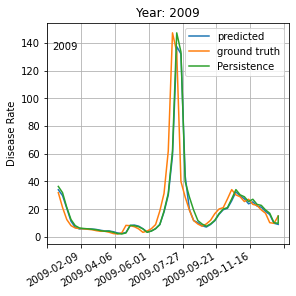

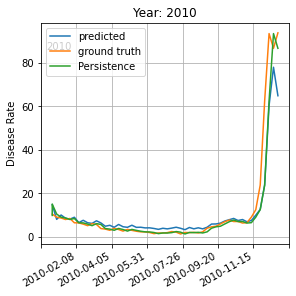

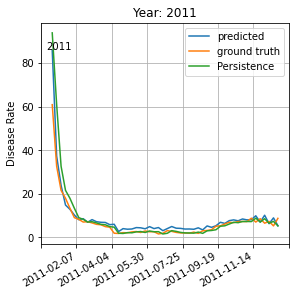

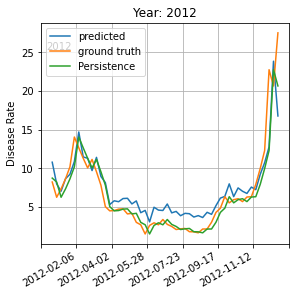

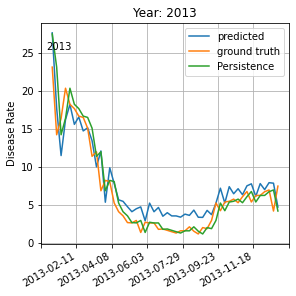

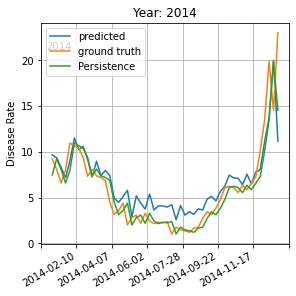

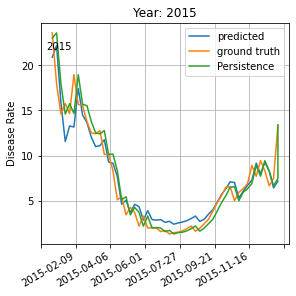

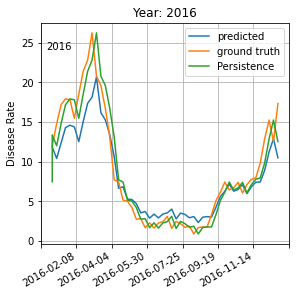

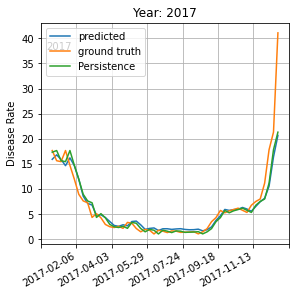

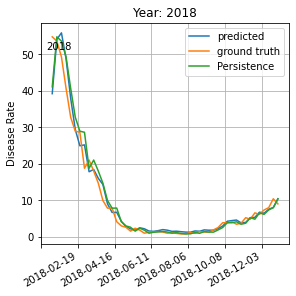

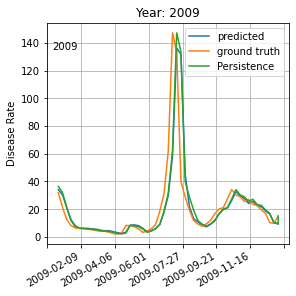

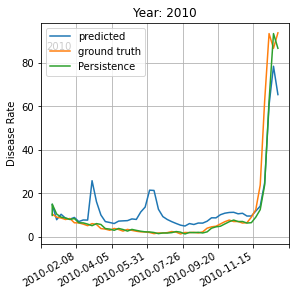

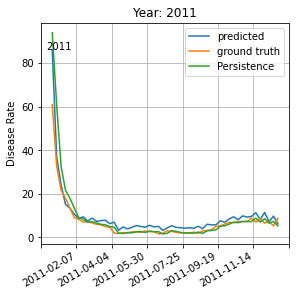

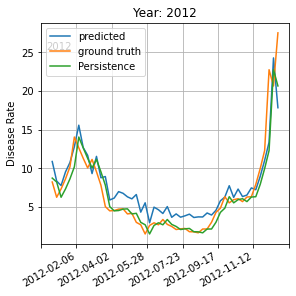

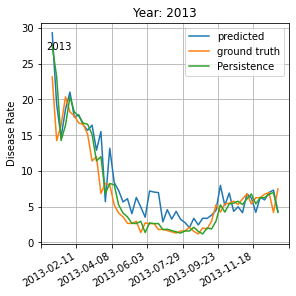

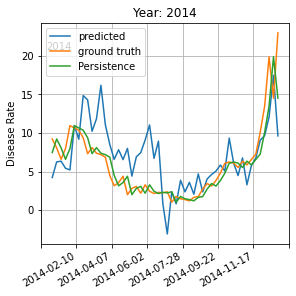

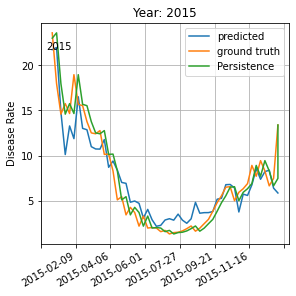

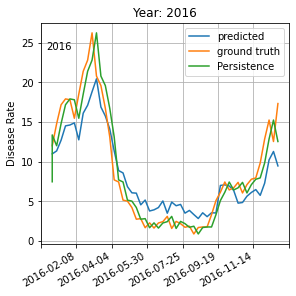

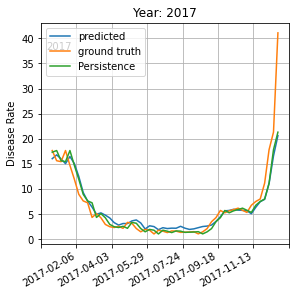

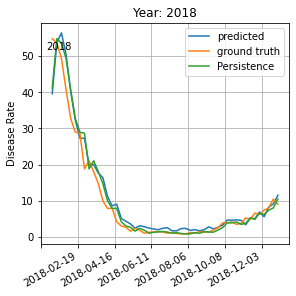

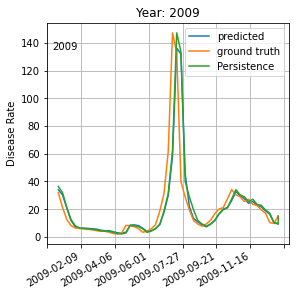

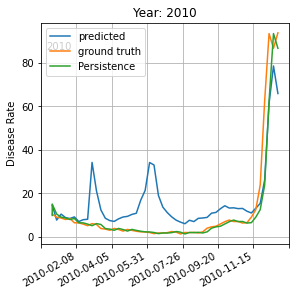

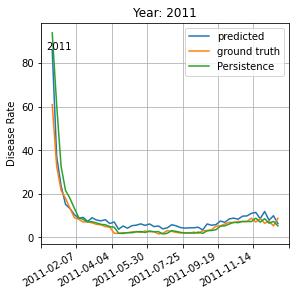

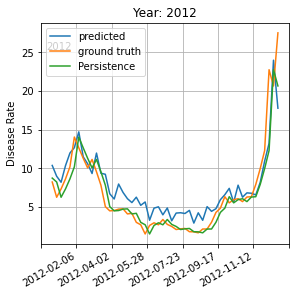

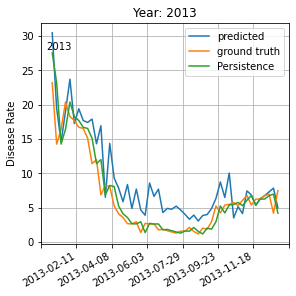

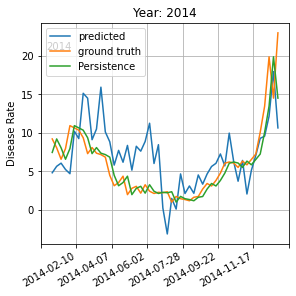

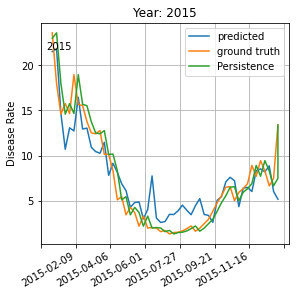

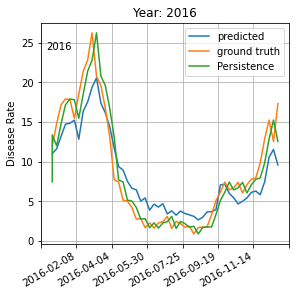

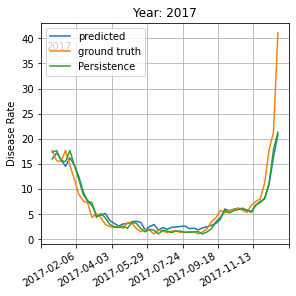

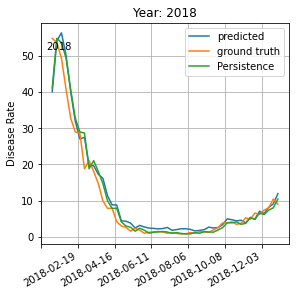

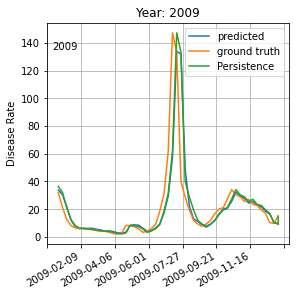

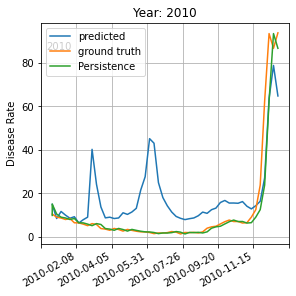

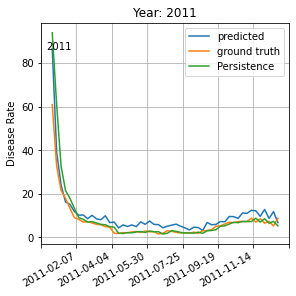

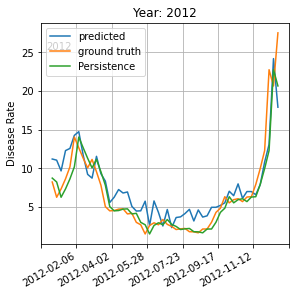

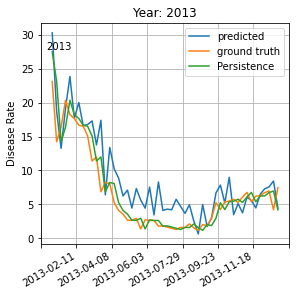

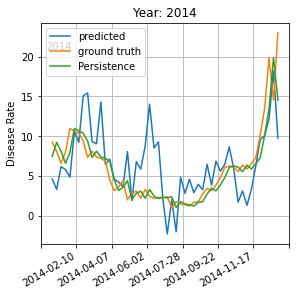

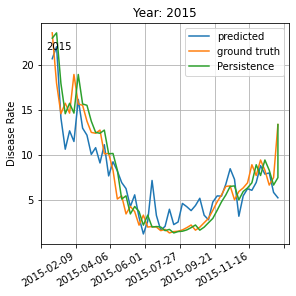

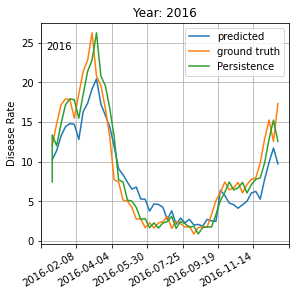

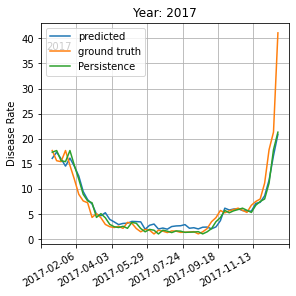

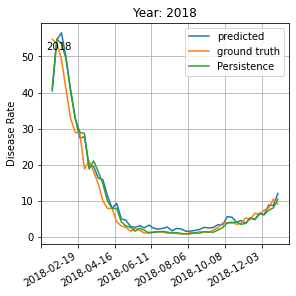

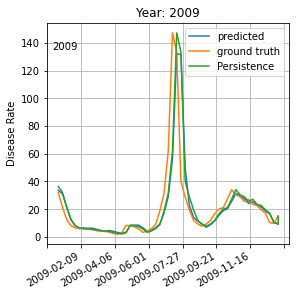

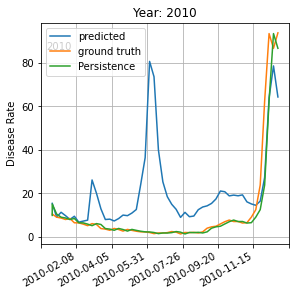

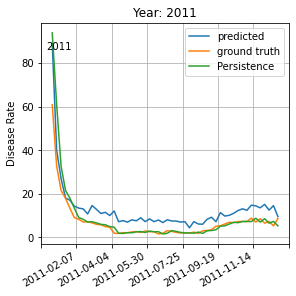

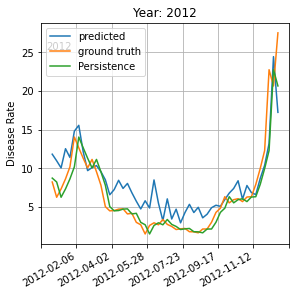

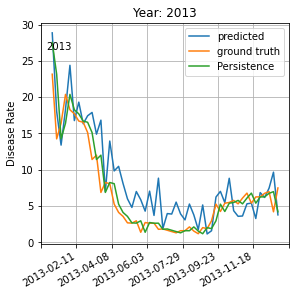

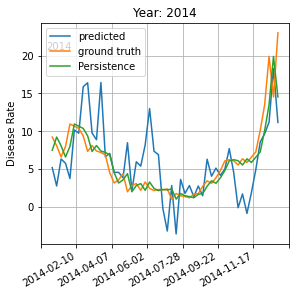

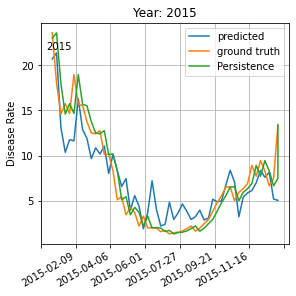

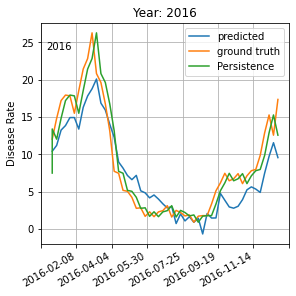

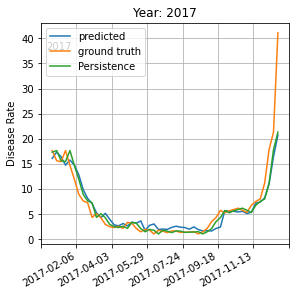

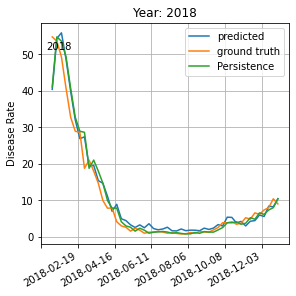

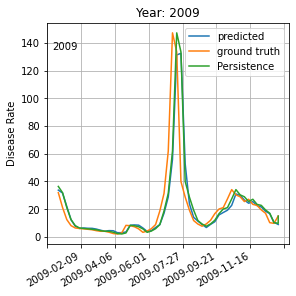

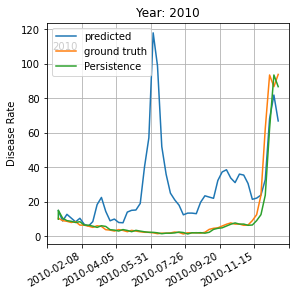

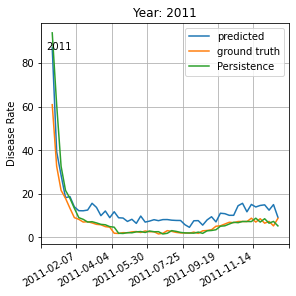

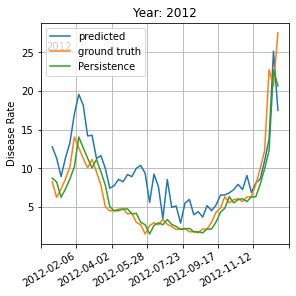

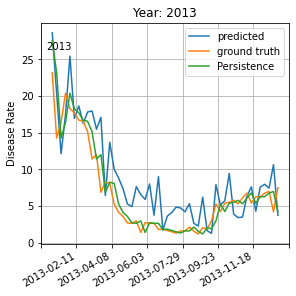

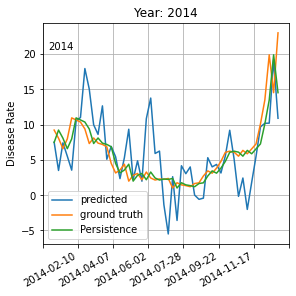

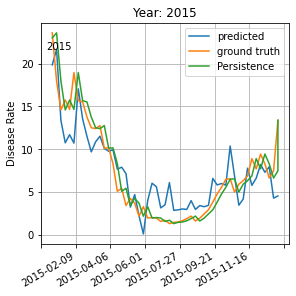

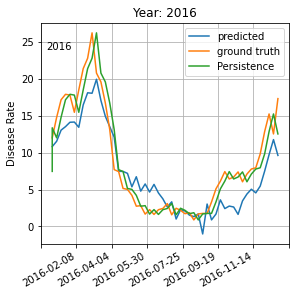

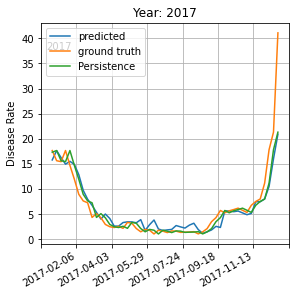

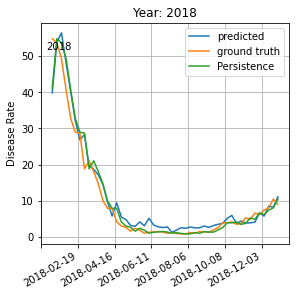

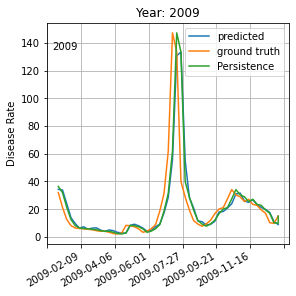

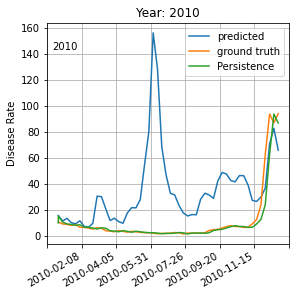

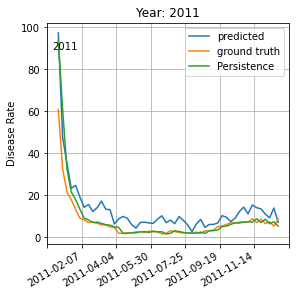

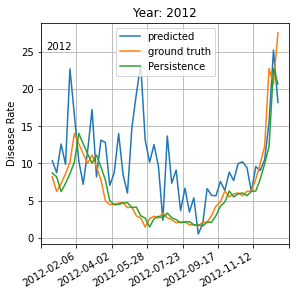

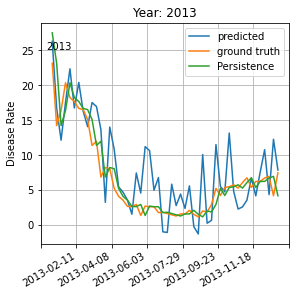

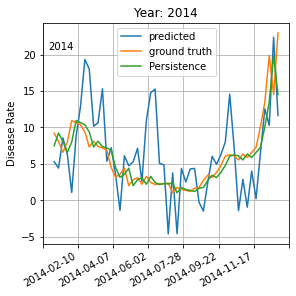

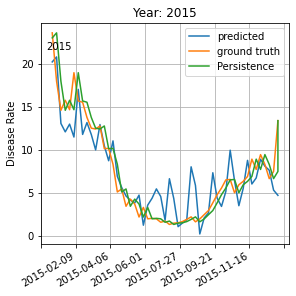

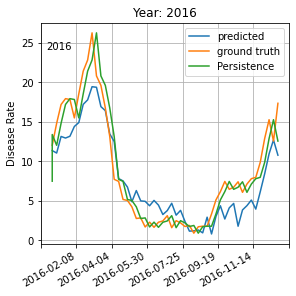

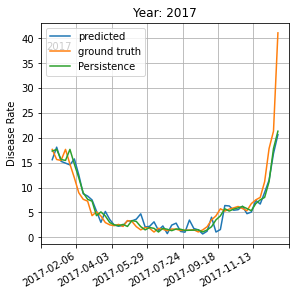

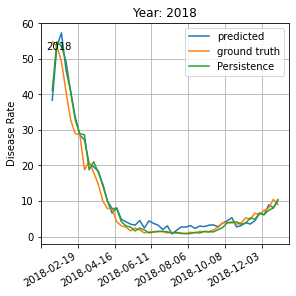

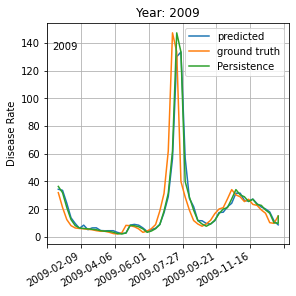

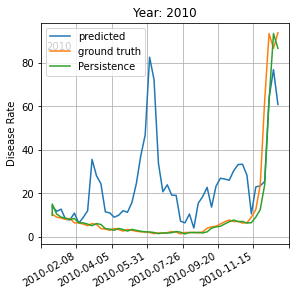

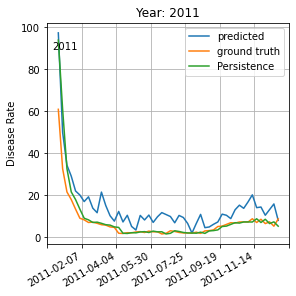

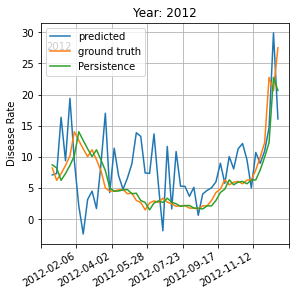

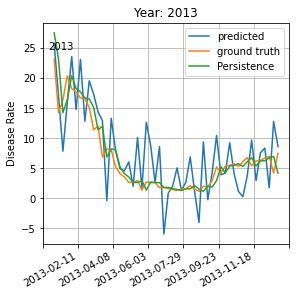

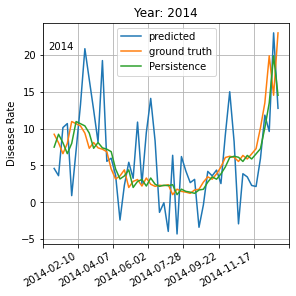

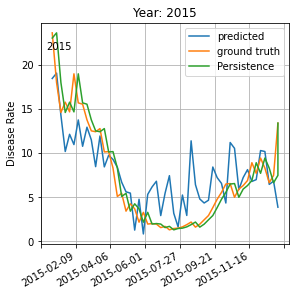

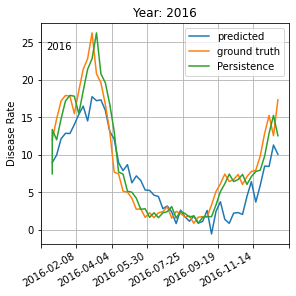

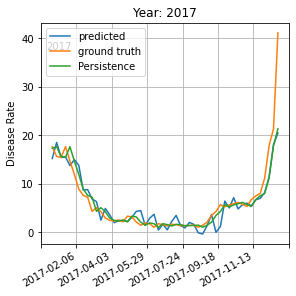

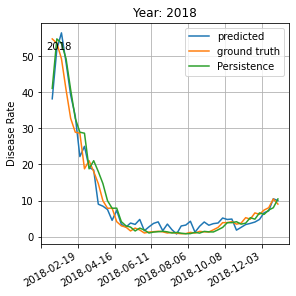

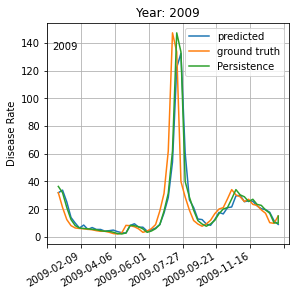

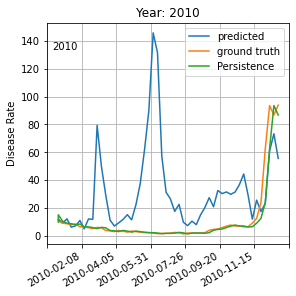

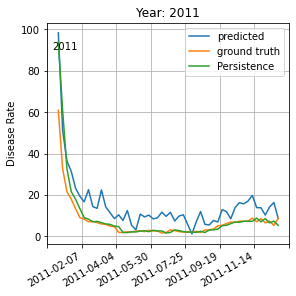

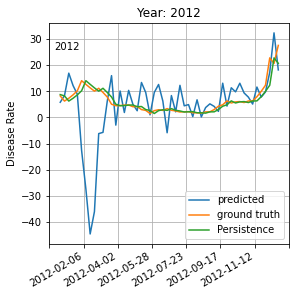

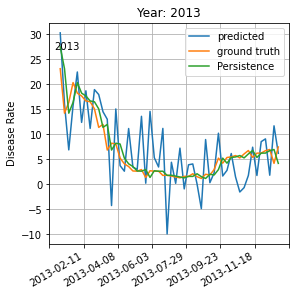

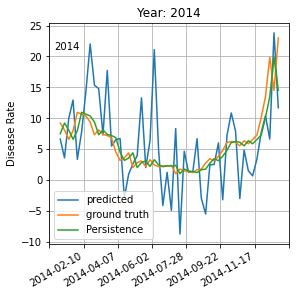

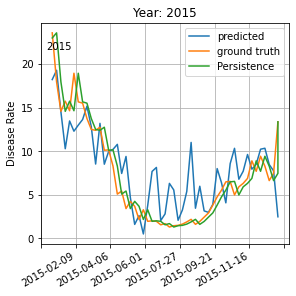

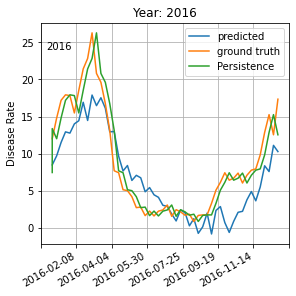

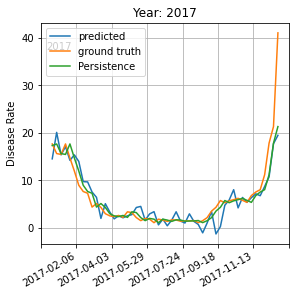

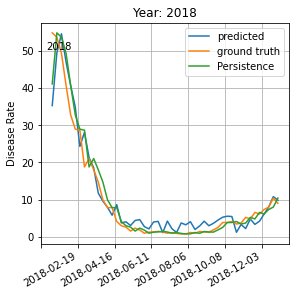

In [24]:
#create mse dataframe
#to show mse from model trained on "historic data alone"
d = {'year':["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017","2018"]}
mse_df = pd.DataFrame(data=d)


mse_list = Ridge(df)
mse_df["Historic Data Alone"]= mse_list
mse_df

#populate mse dataframe from model trained from "historic data + 'n-treshold' terms"
for i in range(50, 450, 50): 
    t_df = pd.read_csv("date_time_threshold_data_frames/{}_zero_terms.csv".format(i))
    d_n_t_df = pd.merge(df, t_df, on=["year week","year","week", "Disease Rate"])
    col = d_n_t_df.pop("Disease Rate")
    d_n_t_df.insert(d_n_t_df.shape[1], col.name, col)
    print("{} threshold with previous 4-week data".format(i))
    mse_list = Ridge(d_n_t_df)
    mse_df["historic data + {} threshold".format(i)] = mse_list
    
#include mse from persistence model 
persistence_df= create_persistence(df, 1)
mses = []
for i in range(2009,2019):
    data = persistence_df.loc[persistence_df["year"]==i]
    mse = mean_squared_error(data["Persistance"], data["Disease Rate"])
    mses.append(mse)
mse_df["Persistence mse"] = mses 

In [18]:
mse_df

year  Historic Data Alone  historic data + 50 threshold  \
0  2009           345.725013                    347.134160   
1  2010            72.854776                    109.081517   
2  2011            15.676916                     17.923531   
3  2012             7.112991                      6.871384   
4  2013             5.290808                      8.177025   
5  2014             6.577956                     17.703156   
6  2015             3.433123                      5.154181   
7  2016             7.527786                      9.358228   
8  2017            10.804443                     11.031832   
9  2018             9.939620                     13.185072   

   historic data + 100 threshold  historic data + 150 threshold  \
0                     347.639931                     354.620092   
1                     163.400012                     229.963524   
2                      18.737845                      23.292503   
3                       7.389604                       7.671146   
4                      12.914442                      12.274523   
5                      17.714914                      18.868041   
6                       6.124693                       6.610653   
7                       8.809051                       9.208799   
8                      10.951905                      10.854471   
9                      12.615990                      12.573558   

   historic data + 200 threshold  historic data + 250 threshold  \
0                     358.018664                     368.329878   
1                     419.552070                     853.295414   
2                      45.246370                      46.280763   
3                       9.791496                      17.438894   
4                      12.571043                      14.242575   
5                      20.007541                      21.337733   
6                       6.948873                       7.821005   
7                      10.560426                      11.690997   
8                      11.428344                      11.635930   
9                      11.410235                      12.902507   

   historic data + 300 threshold  historic data + 350 threshold  \
0                     378.409442                     378.469061   
1                    1508.358712                     549.928529   
2                      65.801585                      84.242983   
3                      40.850567                      37.157206   
4                      16.314703                      20.804735   
5                      30.696238                      31.177126   
6                       7.458652                      12.191475   
7                       9.568565                      14.338433   
8                      11.741649                      12.342842   
9                      13.410327                      13.692142   

   historic data + 400 threshold  Persistence mse  
0                     391.545049       343.348303  
1                    1462.145458        52.846662  
2                      95.251139        40.638749  
3                     182.747339         4.428477  
4                      29.839178         4.190132  
5                      40.363452         4.080403  
6                      12.134517         3.164744  
7                      16.344690         4.084953  
8                      14.346273         9.977886  
9                      16.620055        10.918060